In [317]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [318]:
df = pd.read_csv('/content/btc-usdt.csv')
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-30 00:00:00.000000000,9509.07,9535.00,9503.07,9517.75,381.293856,2019-07-30 00:29:59.999000064,3.631211e+06,3492,216.528742,2.062189e+06,0
1,2019-07-30 00:30:00.000000000,9517.03,9539.00,9507.00,9532.58,258.514869,2019-07-30 00:59:59.999000064,2.462134e+06,3133,141.887550,1.351182e+06,0
2,2019-07-30 01:00:00.000000000,9533.59,9534.00,9500.00,9500.25,275.797270,2019-07-30 01:29:59.999000064,2.624322e+06,3583,114.238457,1.087402e+06,0
3,2019-07-30 01:30:00.000000000,9500.25,9514.46,9460.71,9465.25,485.218470,2019-07-30 01:59:59.999000064,4.604004e+06,5330,225.681291,2.141459e+06,0
4,2019-07-30 02:00:00.000000000,9465.25,9488.94,9430.01,9460.42,498.669626,2019-07-30 02:29:59.999000064,4.717269e+06,6197,228.535910,2.162163e+06,0


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54259 entries, 0 to 54258
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open Time           54259 non-null  object 
 1   Open                54259 non-null  float64
 2   High                54259 non-null  float64
 3   Low                 54259 non-null  float64
 4   Close               54259 non-null  float64
 5   Volume              54259 non-null  float64
 6   Close Time          54259 non-null  object 
 7   Quote Asset Volume  54259 non-null  float64
 8   Number of Trades    54259 non-null  int64  
 9   TB Base Volume      54259 non-null  float64
 10  TB Quote Volume     54259 non-null  float64
 11  Ignore              54259 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 5.0+ MB


In [320]:

df.shape


(54259, 12)

In [321]:
df.isnull().sum()

Open Time             0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64

In [322]:
group = df.groupby('Close Time')
close = group['Close'].mean()

In [323]:
pred_range = 120
data_train= persen[:len(persen)-pred_range].values.reshape(-1,1)
data_test= persen[len(persen)-pred_range:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(data_train)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(data_test)

In [324]:
def preprocess_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    npx = np.array(dataX)
    npy = np.array(dataY)
    rshapeX = np.reshape(npx, (npx.shape[0], 1, npx.shape[1]))
    return rshapeX, npy

train_x, train_y = preprocess_dataset(scaled_train)
test_x, test_y = preprocess_dataset(scaled_test)

In [325]:
model = Sequential()
model.add(LSTM(10,activation="sigmoid",return_sequences = True,input_shape = (None, 1)))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, None, 10)          480       
                                                                 
 dense_28 (Dense)            (None, None, 1)           11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [326]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=["mae"])
callback = EarlyStopping(monitor='loss', patience=5) #callback untuk stop berdasarkan loss
history = model.fit(train_x, train_y, batch_size = 32, epochs = 100, verbose=1, shuffle=False, validation_split=0.2, callbacks=[callback])


Epoch 1/100
29/29 [==============================] - 1s 15ms/step - loss: 0.1646 - mae: 0.3666 - val_loss: 0.4423 - val_mae: 0.6457
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0931 - mae: 0.2450 - val_loss: 0.3168 - val_mae: 0.5403
Epoch 3/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0599 - mae: 0.1832 - val_loss: 0.2395 - val_mae: 0.4638
Epoch 4/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0460 - mae: 0.1706 - val_loss: 0.1929 - val_mae: 0.4109
Epoch 5/100
29/29 [==============================] - 0s 8ms/step - loss: 0.0412 - mae: 0.1703 - val_loss: 0.1653 - val_mae: 0.3762
Epoch 6/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0398 - mae: 0.1714 - val_loss: 0.1490 - val_mae: 0.3544
Epoch 7/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0396 - mae: 0.1724 - val_loss: 0.1394 - val_mae: 0.3409
Epoch 8/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0396 - 

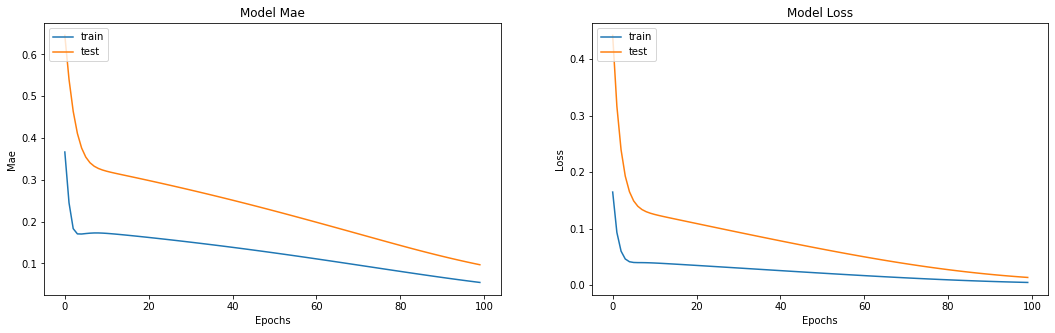

In [327]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')

plt.show()